# Kullback-Leibler Divergence a.k.a Relative Entropy

Given two probability distribution $p(x)$ and $q(x)$ over a discrete random variable $X$, the relative entropy  $D(p||q)$ is defined as follows:



$$
\begin{aligned}
D(p||q)=\sum_{x\in X} p(x) log{\frac{p(x)}{q(x)}}
\end{aligned}
$$



In [1]:
import numpy as np

def listToDict(l):
    d = {}
    
    for i in range(0,len(l)):
        if l[i] in d:
            d[l[i]] += 1
        else:
            d[l[i]] = 1   
            
    return d        

def entropy(l):
    d = listToDict(l)
    s = 0.0 
    
    for k in d:
        p = d[k]*1.0/len(l)
        s -= p*np.log(p)
        
    return s

def divergence(l1, l2):
    d1 = listToDict(l1)
    d2 = listToDict(l2)
    s = 0.0
    
    for k in d1:
        p1 = d1[k]*1.0/len(l1)
        if k in d2:
            p2 = d2[k]*1.0/len(l2)
            s += p1*np.log(p1/p2)
        else:
            return float("inf")
    
    return s

def JSD(l1, l2):
    m = [0]*(len(l1)+len(l2))
    for i in range(len(l1)):
        m[i] = l1[i]
    for i in range(len(l2)):
        m[len(l1)+i] = l2[i]
    
    count = listToDict(m)
    for k in count:
        x = count[k]
        while x>count[k]/2+1:
            for i in range(len(m)):
                if m[i] == k:
                    del m[i]
                    x -= 1
                    break
    
    return (divergence(l1, m) + divergence(l2, m))/2
        

## Example 1

Generate 1000 integers from 1 to 10, let it $p(x)$.
Generate 1000 integers from 1 to 10, let it $q(x)$.

1. Convert event frequency to probability
2. Plot, $p(x)$, $q(x)$ in one graph.

1. Compute entropy of $p(x)$
2. Compute entropy of $q(x)$

3. For each event, compute $p(x) log{\frac{p(x)}{q(x)}}$
3. Then plot $p(x) log{\frac{p(x)}{q(x)}}$. x-axis is event, y-axis is probability
3. Compute KL divergence $D(p||q)$

3. For each event, compute $q(x) log{\frac{q(x)}{p(x)}}$
3. Then plot $q(x) log{\frac{q(x)}{p(x)}}$. x-axis is event, y-axis is probability
4. Compute KL divergence $D(q||p)$


Entropy of p is 2.299628
Entropy of q is 2.299660
KL Divergence p||q is 0.003423
KL Divergence q||p is 0.003482
JS Divergence is 0.000866


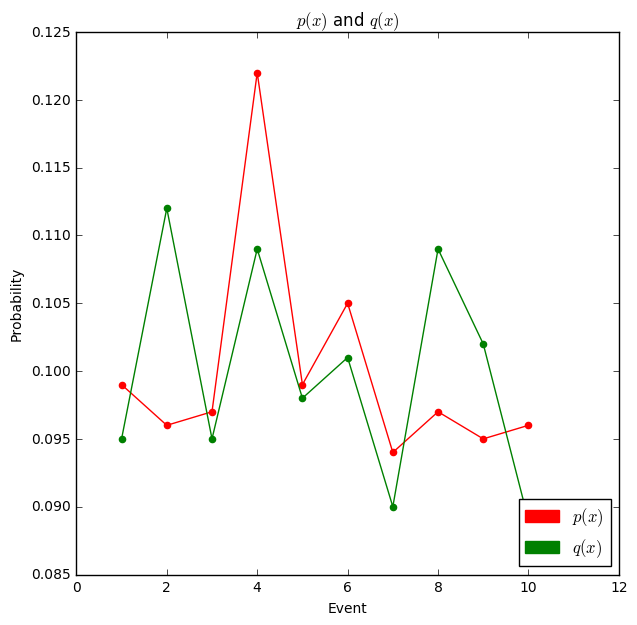

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

np.random.seed(0)
p = np.random.randint(1, 11, 1000)
q = np.random.randint(1, 11, 1000)
pd = listToDict(p)
qd = listToDict(q)
p1 = [0.0]*10 
q1 = [0.0]*10
x = [0]*10

for i in range (1, 11):
    x[i-1] = i
    if i in pd:
        p1[i-1] = pd[i]*1.0/len(p)
    if i in qd:
        q1[i-1] = qd[i]*1.0/len(p)

print("Entropy of p is %f" %entropy(p))
print("Entropy of q is %f" %entropy(q))

print("KL Divergence p||q is %f" %divergence(p,q))
print("KL Divergence q||p is %f" %divergence(q,p))

print("JS Divergence is %f" %JSD(p, q))

fig, ax = plt.subplots(figsize=(7,7))
ax.set_xlabel('Event')
ax.set_ylabel('Probability')
ax.set_title('$p(x)$ and $q(x)$')
plt.plot(x, p1, 'k', color = 'r')
plt.scatter(x, p1, color = 'r')

plt.plot(x, q1, 'k', color = 'g')
plt.scatter(x, q1, color = 'g')

red_patch = mpatches.Patch(color='red', label='$p(x)$')
green_patch = mpatches.Patch(color='green', label='$q(x)$')

plt.legend(handles=[red_patch, green_patch], loc=4)
plt.show()

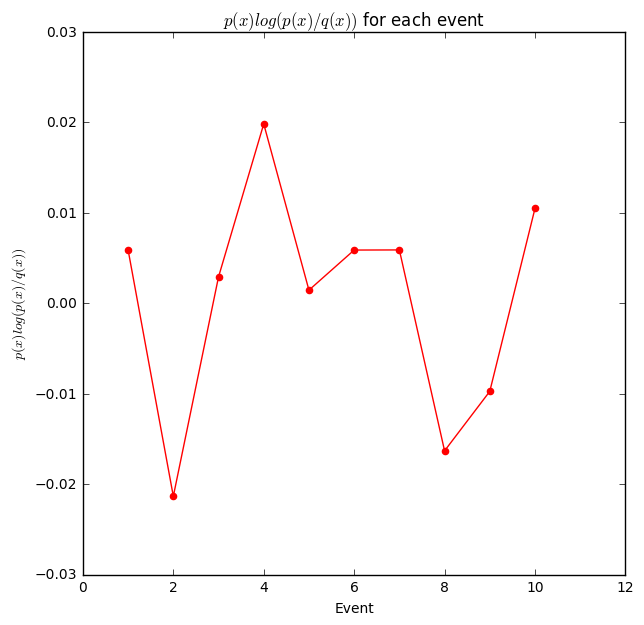

In [3]:
import numpy as np
import matplotlib.pyplot as plt

r = [0.0]*10 #r[n] stores the n+1th divergence
x = [0]*10

for i in range(1,11):
    x[i-1] = i
    if i in pd:
        pp = pd[i]*1.0/len(p)
        if i in qd:
            qp = qd[i]*1.0/len(q)
            r[i-1] = pp*np.log2(pp/qp)
        else:
            r[i-1] = float("inf")
    else:
        r[i-1] = 0
        
fig, ax = plt.subplots(figsize=(7,7))
ax.set_xlabel('Event')
ax.set_ylabel('$p(x)log(p(x)/q(x))$')
ax.set_title('$p(x)log(p(x)/q(x))$ for each event')
plt.plot(x, r, 'k', color = 'r')
plt.scatter(x, r, color = 'r')
plt.show()

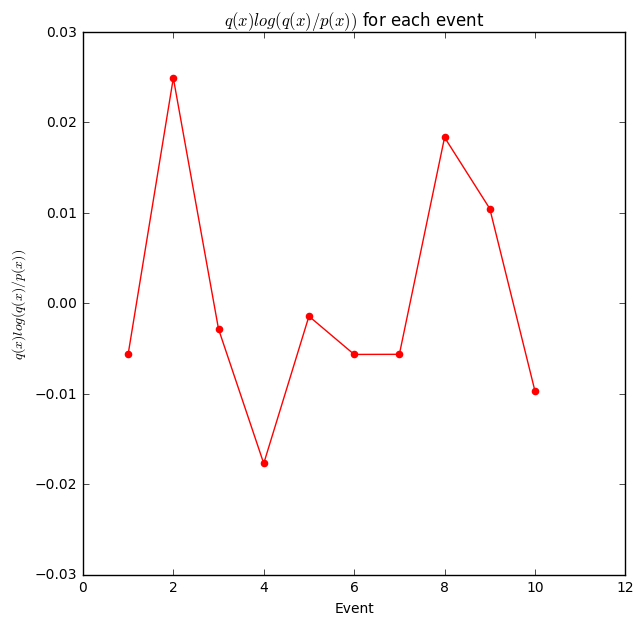

In [4]:
import numpy as np
import matplotlib.pyplot as plt

r = [0.0]*10 #r[n] stores the n+1th divergence
x = [0]*10

for i in range(1,11):
    x[i-1] = i
    if i in qd:
        qp = qd[i]*1.0/len(q)
        if i in pd:
            pp = pd[i]*1.0/len(p)
            r[i-1] = qp*np.log2(qp/pp)
        else:
            r[i-1] = float("inf")
    else:
        r[i-1] = 0
        
fig, ax = plt.subplots(figsize=(7,7))
ax.set_xlabel('Event')
ax.set_ylabel('$q(x)log(q(x)/p(x))$')
ax.set_title('$q(x)log(q(x)/p(x))$ for each event')
plt.plot(x, r, 'k', color = 'r')
plt.scatter(x, r, color = 'r')
plt.show()

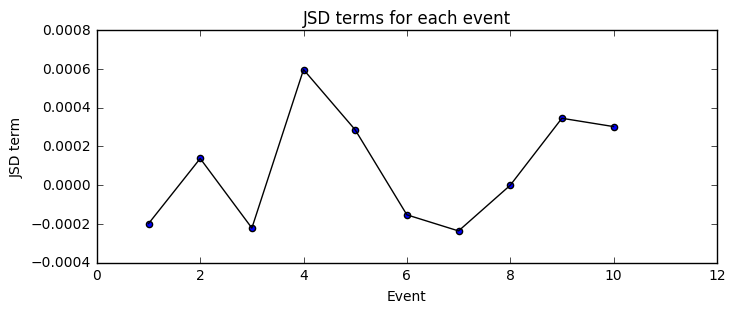

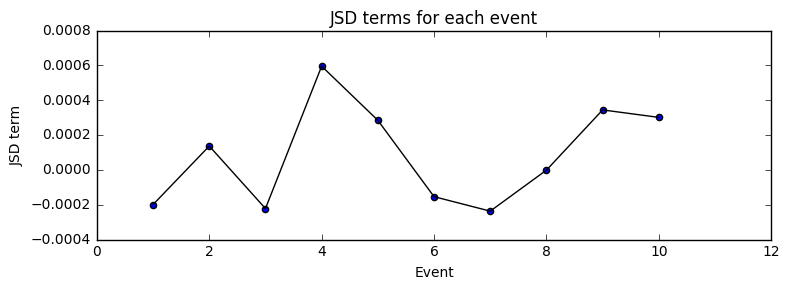

In [5]:
import numpy as np
import matplotlib.pyplot as plt

d1 = listToDict(p)
d2 = listToDict(q)


m = [0]*(len(p)+len(q))
for i in range(len(p)):
    m[i] = p[i]
for i in range(len(q)):
    m[len(p)+i] = q[i]
count = listToDict(m)
for k in count:
    x = count[k]
    while x>count[k]/2+1:
        for i in range(len(m)):
            if m[i] == k:
                del m[i]
                x -= 1
                break
                
dm = listToDict(m)                

fig, ax4 = plt.subplots(figsize=(8,3))
ax4.set_xlabel('Event')
ax4.set_ylabel('JSD term')
ax4.set_title('JSD terms for each event')
x = []
y = []
for i in set(d1.keys()) | set(d2.keys()):
    x.append(i)
    p1 = (d1[i] + 1)/(sum(list(d1.values())) + len(set(d1.keys()) | set(d2.keys()))) #psuedocounting allows all data to be factored in and the result is never infinity
    p2 = (d2[i] + 1)/(sum(list(d2.values())) + len(set(d1.keys()) | set(d2.keys()))) #the extra len accounts for each of the +1's in the psuedocounting
    pm = (dm[i] + 1)/(sum(list(dm.values())) + len(set(d1.keys()) | set(d2.keys())))
    y.append((p1*1.0*np.log(p1/pm) + p2*1.0*np.log(p2/pm))/2)
    
key = np.argsort(x)
x.sort()
ys = []
for i in range(len(key)):
    ys.append(y[key[i]])
    
ax4.plot(x, ys, 'k')    
ax4.scatter(x, ys)




m = [0]*(len(q)+len(p))
for i in range(len(q)):
    m[i] = q[i]
for i in range(len(p)):
    m[len(q)+i] = p[i]
count = listToDict(m)
for k in count:
    x = count[k]
    while x>count[k]/2+1:
        for i in range(len(m)):
            if m[i] == k:
                del m[i]
                x -= 1
                break
                
dm = listToDict(m)

fig, ax5 = plt.subplots(figsize=(8,3))
ax5.set_xlabel('Event')
ax5.set_ylabel('JSD term')
ax5.set_title('JSD terms for each event')
x = []
y = []
for i in set(d1.keys()) | set(d2.keys()):
    x.append(i)
    p1 = (d1[i] + 1)/(sum(list(d1.values())) + len(set(d1.keys()) | set(d2.keys()))) #psuedocounting allows all data to be factored in and the result is never infinity
    p2 = (d2[i] + 1)/(sum(list(d2.values())) + len(set(d1.keys()) | set(d2.keys()))) #the extra len accounts for each of the +1's in the psuedocounting
    pm = (dm[i] + 1)/(sum(list(dm.values())) + len(set(d1.keys()) | set(d2.keys())))
    y.append((p2*1.0*np.log(p2/pm) + p1*1.0*np.log(p1/pm))/2)
    
key = np.argsort(x)
x.sort()
ys = []
for i in range(len(key)):
    ys.append(y[key[i]])
    
ax5.plot(x, ys, 'k')    
ax5.scatter(x, ys)

fig.tight_layout()
plt.show()